<a href="https://colab.research.google.com/github/ishtiaque7/Artificial_Intelligence_AILab/blob/main/AI_Lab_4_Multiple_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Research/sample dataset/carprices.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [ ]:
df.shape

(16, 4)

In [ ]:
dummies=pd.get_dummies(df['Car Model'])
dummies

,Audi,BMW X5,Mercedez Benz,Toyota
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [ ]:
marged=pd.concat([df,dummies],axis='columns')
marged

,Car Model,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,BMW X5,69000,18000,6,0,1,0,0
1,BMW X5,35000,34000,3,0,1,0,0
2,BMW X5,57000,26100,5,0,1,0,0
3,BMW X5,22500,40000,2,0,1,0,0
4,BMW X5,46000,31500,4,0,1,0,0
5,Audi,59000,29400,5,1,0,0,0
6,Audi,52000,32000,5,1,0,0,0
7,Audi,72000,19300,6,1,0,0,0
8,Audi,91000,12000,8,1,0,0,0
9,Mercedez Benz,67000,22000,6,0,0,1,0


In [ ]:
final=marged.drop(['Car Model'],axis='columns')
final

,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,18000,6,0,1,0,0
1,35000,34000,3,0,1,0,0
2,57000,26100,5,0,1,0,0
3,22500,40000,2,0,1,0,0
4,46000,31500,4,0,1,0,0
5,59000,29400,5,1,0,0,0
6,52000,32000,5,1,0,0,0
7,72000,19300,6,1,0,0,0
8,91000,12000,8,1,0,0,0
9,67000,22000,6,0,0,1,0


In [ ]:
y=final['Sell Price']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
13    42000
14    32000
15    55000
Name: Sell Price, dtype: int64

In [ ]:
final.columns

Index(['Mileage', 'Sell Price', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ',
       'Toyota'],
      dtype='object')

In [ ]:
X=final[['Mileage', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ','Toyota']]
X

,Mileage,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,6,0,1,0,0
1,35000,3,0,1,0,0
2,57000,5,0,1,0,0
3,22500,2,0,1,0,0
4,46000,4,0,1,0,0
5,59000,5,1,0,0,0
6,52000,5,1,0,0,0
7,72000,6,1,0,0,0
8,91000,8,1,0,0,0
9,67000,6,0,0,1,0


In [ ]:
final.shape

(16, 7)

In [ ]:
# Dataset Spliting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

reg.predict(X_test)

array([43346.0890394 , 48316.18898158, 22713.32287107, 23723.16015528])

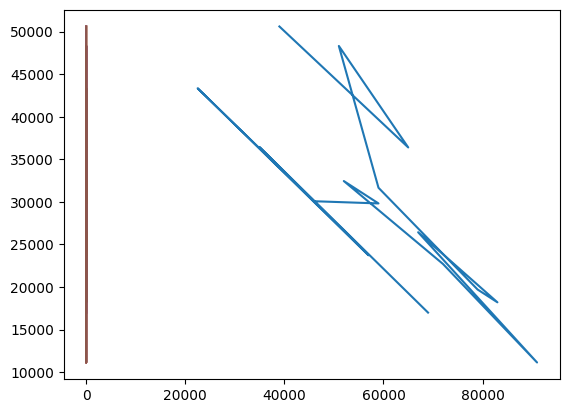

In [ ]:
plt.plot(X,reg.predict(X))